# Car prices Dataset
- Link to dataset - https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
df.shape[0]

558837

## Columns examination 

In [7]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
df.dropna(subset = ["make","model","trim","color","odometer"],inplace = True)

In [9]:
df.drop(columns = 'vin',inplace = True)

In [10]:
df.isna().sum()

year                0
make                0
model               0
trim                0
body             2535
transmission    63379
state               0
condition       11510
odometer            0
color               0
interior            0
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

# Adjusting transmission column

In [11]:
df["transmission"].value_counts()

transmission
automatic    466955
manual        16918
sedan            15
Sedan            11
Name: count, dtype: int64

In [12]:
df = df[~df["transmission"].isin(["sedan","Sedan"])]
df['transmission'] = df["transmission"].str.capitalize()

In [13]:
df[(~df["transmission"].isna())].sort_values(by = ['make'])

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
271080,2001,Acura,MDX,Touring,SUV,Automatic,va,19.0,192889.0,silver,black,credit acceptance corp/vrs/southfield,2975.0,2400.0,Thu Feb 12 2015 01:05:00 GMT-0800 (PST)
257571,2011,Acura,TL,Base,Sedan,Automatic,fl,2.0,72452.0,gray,beige,capital one auto finance,16000.0,16600.0,Wed Feb 11 2015 01:10:00 GMT-0800 (PST)
443519,2007,Acura,RDX,Base,SUV,Automatic,az,32.0,95782.0,black,gray,moore automotive group,10700.0,9800.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
148562,2011,Acura,MDX,Base,SUV,Automatic,il,3.0,44254.0,black,gray,ahfc/honda lease/trust/hvt inc. eot acuras,23500.0,22000.0,Thu Jan 22 2015 02:00:00 GMT-0800 (PST)
16899,2007,Acura,MDX,Base,SUV,Automatic,tx,NaN,99533.0,green,—,bmw of san antonio,13200.0,13200.0,Fri Dec 19 2014 10:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69157,2014,vw,routan,sel prm,NaN,Automatic,oh,43.0,25053.0,—,gray,vw credit,22300.0,25000.0,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
69154,2014,vw,routan,se,NaN,Automatic,oh,5.0,6842.0,—,gray,vw credit,21900.0,21700.0,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
103699,2013,vw,routan,se w/nav,NaN,Automatic,il,5.0,10313.0,—,black,vw credit,20800.0,20600.0,Tue Jan 13 2015 10:00:00 GMT-0800 (PST)
107814,2014,vw,routan,se,NaN,Automatic,il,39.0,15376.0,—,gray,vw credit,20800.0,20400.0,Tue Jan 13 2015 10:00:00 GMT-0800 (PST)


In [14]:
df[df["transmission"].isna()].sort_values(by = ['make'])

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
315386,2012,Acura,RDX,Base,SUV,NaN,pa,48.0,32598.0,white,gray,adcock brothers inc,21100.0,23250.0,Fri Feb 13 2015 01:00:00 GMT-0800 (PST)
264896,2007,Acura,MDX,Base,SUV,NaN,pa,31.0,396211.0,black,beige,big tree auto brokers,8625.0,8500.0,Fri Feb 06 2015 01:00:00 GMT-0800 (PST)
427777,2006,Acura,RSX,Base,Hatchback,NaN,pa,19.0,117683.0,black,black,bmw of annapolis/mini of annapolis,5475.0,3200.0,Fri May 22 2015 02:15:00 GMT-0700 (PDT)
427829,2005,Acura,TL,3.2,Sedan,NaN,tx,22.0,126683.0,green,brown,dt credit corporation,6200.0,4700.0,Wed May 27 2015 03:00:00 GMT-0700 (PDT)
147329,2012,Acura,MDX,Base,SUV,NaN,pa,25.0,38162.0,black,black,ahfc/honda lease/trust/hvt inc. eot acuras,25700.0,24500.0,Fri Jan 23 2015 01:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65502,2011,vw,jetta,comfrtline,NaN,NaN,on,19.0,63397.0,brown,beige,vw credit canada inc,10500.0,7600.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
65518,2011,vw,jetta,comfrtline,NaN,NaN,on,2.0,74093.0,white,black,vw credit canada inc,10100.0,7800.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
65522,2011,vw,jetta,comfrtline,NaN,NaN,on,32.0,110754.0,blue,black,vw credit canada inc,8600.0,8400.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)
65526,2011,vw,jetta,comfrtline,NaN,NaN,on,44.0,60834.0,silver,black,vw credit canada inc,10600.0,10800.0,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)


In [15]:
transmission_mapping = df.dropna(subset=["transmission"]).groupby(["make", "model", "trim"])["transmission"].first().to_dict()

# Update missing transmission values using the mapping
mask = df["transmission"].isna()
keys = df.loc[mask, ["make", "model", "trim"]].apply(tuple, axis=1)
df.loc[mask, "transmission"] = keys.map(transmission_mapping)


- Let's drop the rest of missing records

In [16]:
df.dropna(subset=["transmission"], inplace=True)

# Adjusting model column

In [17]:
df['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',
     

In [18]:
df['model'] = df['model'].apply(lambda x: x.capitalize() if x.islower() else x)

# Adjusting state column

In [19]:
df['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [20]:
df = df[~df['state'].isin(['3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'])]

In [21]:
df['state'] = df['state'].str.upper()

# Adjusting make column

In [22]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mazda', 'toyota', 'lexus', 'gmc truck', 'honda',
       'porsche', 'Saab', 'mercedes', 'Suzuki', 'dodge', 'nissan',
       'subaru', 'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu',
       'dodge tk', 'Geo', 'volkswagen', 'suzuki', 'Rolls-Royce', 'kia',
       'gmc', 'maserati', 'mercury', 'audi', 'buick', 'mercedes-b',
       'Daewoo', 'chev truck', 'ford tk', 'plymouth', 'vw', 'Plymouth',
       'ford t

In [23]:
df["make"] = df['make'].str.capitalize()
df.loc[(df["make"] == "Vw"),"make"] = 'Volkswagen'
df.loc[(df["make"] == 'Mercedes-b'),"make"] = 'Mercedes-benz'
df.loc[(df["make"] == 'Ford tk'),"make"] = 'Ford truck'
df.loc[(df["make"] == 'Hyundai tk'),"make"] = 'Hyundai truck'
df.loc[(df["make"] == 'Dodge tk'),"make"] = 'Dodge truck'

# Adjusting body column

In [24]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

In [25]:
df.loc[(df['body'].str.contains("cab"))  & (~df['body'].isna()) ,'body'].unique()

array(['Xtracab', 'regular-cab', 'king cab', 'crew cab', 'double cab',
       'regular cab', 'quad cab', 'supercab', 'extended cab',
       'crewmax cab', 'access cab', 'mega cab', 'xtracab', 'club cab',
       'cab plus 4'], dtype=object)

In [26]:
df['body'] = df['body'].str.capitalize()
df.loc[(df["body"] == 'Regular-cab'),"body"] = 'Regular cab'

In [27]:
df[df['body'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
468,2013,Lincoln,Mkt,awd v6,NaN,Automatic,CA,41.0,74874.0,black,black,remarketing by ge/manheim southern california,19300.0,17750.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
743,2012,Bmw,750i,xdr 750i xdriv,NaN,Automatic,CA,4.0,50790.0,gray,black,financial services remarketing (lease),33900.0,33500.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
770,2012,Bmw,750li,750li,NaN,Automatic,CA,37.0,31762.0,black,black,financial services remarketing (lease),45000.0,45000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
793,2012,Bmw,750i,750i,NaN,Automatic,CA,49.0,53016.0,white,gray,financial services remarketing (lease),31300.0,34250.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
794,2012,Bmw,750li,750li,NaN,Automatic,CA,34.0,24739.0,white,gray,financial services remarketing (lease),47000.0,46750.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143161,2007,Ford,Expeditn,el 4x4 limited,NaN,Automatic,FL,35.0,99631.0,brown,black,mint motors,12600.0,13200.0,Wed Jan 14 2015 09:00:00 GMT-0800 (PST)
143419,2005,Cadillac,Srx,awd v6 awd,NaN,Automatic,GA,24.0,76004.0,off-white,beige,germain bmw of naples,6350.0,6600.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
145012,2009,Kia,Borrego,lx,NaN,Automatic,IL,29.0,112614.0,gray,black,remarketing by ge/manheim chicago,7300.0,7000.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
145861,2005,Ford,Explorer,4x4 v6 xlt,NaN,Automatic,NY,28.0,84017.0,silver,gray,adk auto brokers inc,5125.0,4900.0,Thu Jan 15 2015 01:45:00 GMT-0800 (PST)


In [28]:
body_mapping = df.dropna(subset=["body"]).groupby(["make", "model"])["body"].first().to_dict()

# Update missing body values using the mapping
mask = df["body"].isna()
keys = df.loc[mask, ["make", "model"]].apply(tuple, axis=1)
df.loc[mask, "body"] = keys.map(body_mapping)

In [29]:
df.dropna(subset=["body"],inplace = True)

In [30]:
df.isna().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
state               0
condition       11286
odometer            0
color               0
interior            0
seller              0
mmr                12
sellingprice       12
saledate           12
dtype: int64

#  Adjusting trim column

In [31]:
list(df['trim'].unique())

['LX',
 '328i SULEV',
 'T5',
 '650i',
 '2.5 S',
 'Base',
 '1LT',
 '2.0T Premium Plus quattro',
 'LT',
 '3.0T Prestige quattro',
 'SE',
 '2LT',
 'LS',
 'LTZ',
 '528i',
 '1.8 TFSI Premium',
 'T6',
 'sDrive35i',
 '3.0T Premium Plus quattro',
 'Premium Plus quattro',
 'Convenience Group',
 'xDrive35i',
 'Technology Package',
 'Luxury',
 '1.6 SL',
 '1.6 SV',
 'L 3.0T quattro',
 'sDrive28i',
 'Leather Group',
 'quattro',
 '428i SULEV',
 'Work Truck',
 'Advance and Entertainment Packages',
 '535d',
 'G37 Sport',
 'G37 Journey',
 'FX37',
 'Limited',
 '5.0 R-Spec',
 'Signature',
 'GLS',
 'Sport',
 'Sport 2.0T',
 'Turbo',
 'GS',
 'Ultimate',
 '3.8',
 '3.8 Track',
 'Unlimited Rubicon',
 'EX Hybrid',
 '2.5',
 'S550',
 'C250',
 'SX',
 'Unlimited Sahara',
 'C250 Sport',
 'Touring',
 'M37',
 '+',
 'LE',
 'SLK350',
 'E350 Sport',
 'i SV',
 'Latitude',
 'i Touring',
 'JX35',
 'G37x',
 'HSE LUX',
 'EX',
 'i Sport',
 'Pure Plus',
 'L',
 'GLK350',
 'Unlimited Sport',
 'E350 Sport BlueTEC',
 'Pure',
 'GL45

In [32]:
df['trim'] = df['trim'].apply(lambda x: x.capitalize() if x.islower() else x)
df['trim'] = df['trim'].apply(lambda x: x.upper() if len(x) <= 3 else x)

#  Adjusting condition column

In [33]:
condition_to_plot = df.loc[~df['condition'].isna(),'condition']

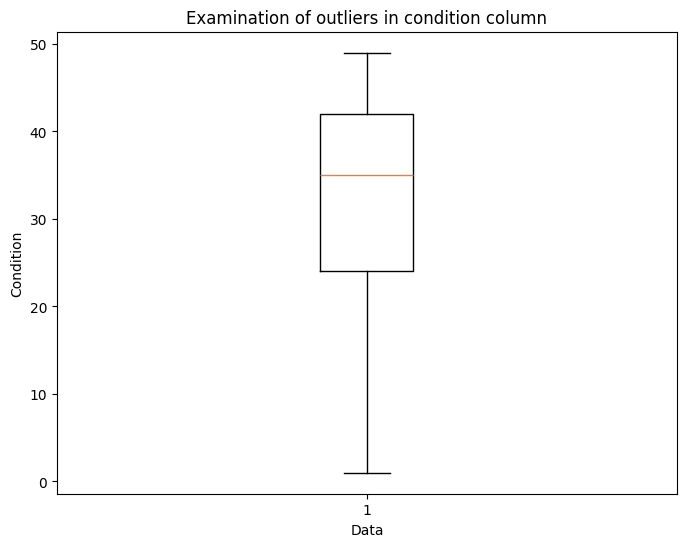

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(condition_to_plot)

plt.title("Examination of outliers in condition column")
plt.ylabel("Condition")
plt.xlabel("Data")
plt.show()

In [35]:
median_for_model = df.groupby(["make","model"]).agg({"condition":"median"})
median_for_model.reset_index(inplace=True)
median_for_model

,make,model,condition
0,Acura,CL,19.0
1,Acura,ILX,38.0
2,Acura,Integra,2.0
3,Acura,Legend,1.0
4,Acura,MDX,34.0
...,...,...,...
771,Volvo,V70,22.0
772,Volvo,XC,27.0
773,Volvo,XC60,42.0
774,Volvo,XC70,37.5


In [36]:
df[df['condition'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
14,2014,Chevrolet,Cruze,2LT,Sedan,Automatic,CA,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
16,2015,Hyundai,Sonata,SE,Sedan,Automatic,CA,NaN,8311.0,red,—,avis tra,15200.0,4200.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
22,2014,Chevrolet,Camaro,LT,Convertible,Automatic,CA,NaN,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
25,2015,Hyundai,Sonata,SE,Sedan,Automatic,CA,NaN,9281.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,15150.0,8500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
28,2014,Bmw,X5,sDrive35i,Suv,Automatic,CA,NaN,11278.0,gray,black,avis rac/san leandro,50400.0,34000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43570,2010,Acura,RDX,SH-AWD,Suv,Automatic,OH,NaN,63454.0,black,gray,thornhill acura,17800.0,14500.0,Tue Dec 23 2014 09:30:00 GMT-0800 (PST)
43579,2011,Toyota,Tundra,Tundra,Double cab,Automatic,TX,NaN,46683.0,black,brown,avalanche preowned vehicles lp,18500.0,19250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
43580,2011,Volkswagen,Jetta,SE PZEV,Sedan,Automatic,OH,NaN,30778.0,black,—,colonial auto sales,9725.0,9500.0,Tue Dec 23 2014 09:30:00 GMT-0800 (PST)
182059,2005,Ford,F-150,XL,Supercab,Automatic,ON,NaN,264448.0,white,gray,auto autos,2250.0,1000.0,Thu Jan 22 2015 10:30:00 GMT-0800 (PST)


In [37]:
merged_df = df.merge(median_for_model, on=["make", "model"], how="left", suffixes=("", "_median"))

# Fill missing condition values with median values where available
mask = merged_df['condition'].isna()
merged_df.loc[mask, 'condition'] = merged_df.loc[mask, 'condition_median']

# Drop the '_median' column as it is no longer needed
merged_df.drop(columns='condition_median', inplace=True)
merged_df.dropna(subset = ['condition'],inplace = True) #for the rest unmatched data
df = merged_df

In [38]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,328i SULEV,Sedan,Automatic,CA,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,Automatic,CA,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,Automatic,CA,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545836,2015,Kia,K900,Luxury,Sedan,Automatic,IN,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
545837,2012,Ram,2500,Power Wagon,Crew cab,Automatic,WA,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
545838,2012,Bmw,X5,xDrive35d,Suv,Automatic,CA,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
545839,2015,Nissan,Altima,2.5 S,Sedan,Automatic,GA,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Adjusting color and interior

In [39]:
cols = ['color',"interior"]
for col in cols:
    df[col] = df[col].str.capitalize()

 # Adjusting mmr,sellingprice

In [40]:
df[df['mmr'].isna()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
299317,2013,Hyundai,Sonata,GLS,Sedan,Automatic,IL,19.0,37254.0,Gray,Gray,kfl llc,NaN,NaN,NaN
396896,2013,Chrysler,300,Base,Sedan,Automatic,IL,27.0,44208.0,Silver,Black,kfl llc,NaN,NaN,NaN
412417,2013,Hyundai,Sonata,GLS,Sedan,Automatic,AZ,28.0,44299.0,Blue,Gray,kfl llc,NaN,NaN,NaN
419592,2013,Chrysler,200,Touring,Sedan,Automatic,IL,25.0,47344.0,White,Black,kfl llc,NaN,NaN,NaN
419608,2013,Dodge,Avenger,SXT,Sedan,Automatic,IL,34.0,44525.0,Gray,Black,kfl llc,NaN,NaN,NaN
419734,2013,Hyundai,Accent,GLS,Sedan,Automatic,IL,3.0,43135.0,Silver,Gray,kfl llc,NaN,NaN,NaN
421822,2013,Kia,Soul,Base,Wagon,Automatic,VA,19.0,29465.0,Silver,Black,kfl llc,NaN,NaN,NaN
446365,2014,Hyundai,Elantra,SE,Sedan,Automatic,IL,19.0,20775.0,White,—,kfl llc,NaN,NaN,NaN
447133,2013,Dodge,Charger,SE,Sedan,Automatic,IL,19.0,45355.0,White,Black,kfl llc,NaN,NaN,NaN
510362,2012,Ford,Fusion,SEL,Sedan,Automatic,VA,26.0,51648.0,Black,Gray,kfl llc,NaN,NaN,NaN


- Since amount of data is not big,we can drop it

In [41]:
df.dropna(subset = ['mmr','sellingprice','saledate'],inplace = True)

# Adjusting saledate

In [42]:
df['saledate'] = pd.to_datetime(df['saledate'],utc=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20268\165830538.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'],utc=True)


In [43]:
df['saledate'] = pd.to_datetime(df['saledate'].dt.date)

- Are there any cars,which were manufactured after seladate?
- We consider them as invalid data

In [44]:
df[df['saledate'].dt.year < df['year']]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,kia motors america inc,20800.0,21500.0,2014-12-16
5,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30
11,2015,Kia,Optima,LX,Sedan,Automatic,CA,48.0,2034.0,Red,Tan,kia motors finance,15150.0,17700.0,2014-12-16
13,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,14634.0,Silver,Black,kia motors america inc,20600.0,21500.0,2014-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67688,2015,Nissan,Altima,2.5 S,Sedan,Automatic,PA,1.0,9399.0,Red,Black,enterprise veh exchange/rental,14950.0,3600.0,2014-12-30
68930,2015,Chevrolet,Tahoe,LTZ,Suv,Automatic,NE,41.0,6018.0,White,Tan,husker auto group inc,55700.0,54600.0,2014-12-31
68932,2015,Chrysler,200,Limited,Sedan,Automatic,IN,2.0,73.0,Gray,Tan,enterprise vehicle exchange / tra / rental / t...,16050.0,6600.0,2014-12-31
71458,2015,Ford,Fusion,SE,Sedan,Automatic,TX,5.0,3427.0,White,Black,rlb investments,13700.0,16300.0,2014-12-31


In [45]:
df = df[~(df['saledate'].dt.year < df['year'])]

# Let's see the correlation of factors,which define the sellingprice

In [46]:
factors = df[["year","condition","odometer","mmr",'sellingprice']]

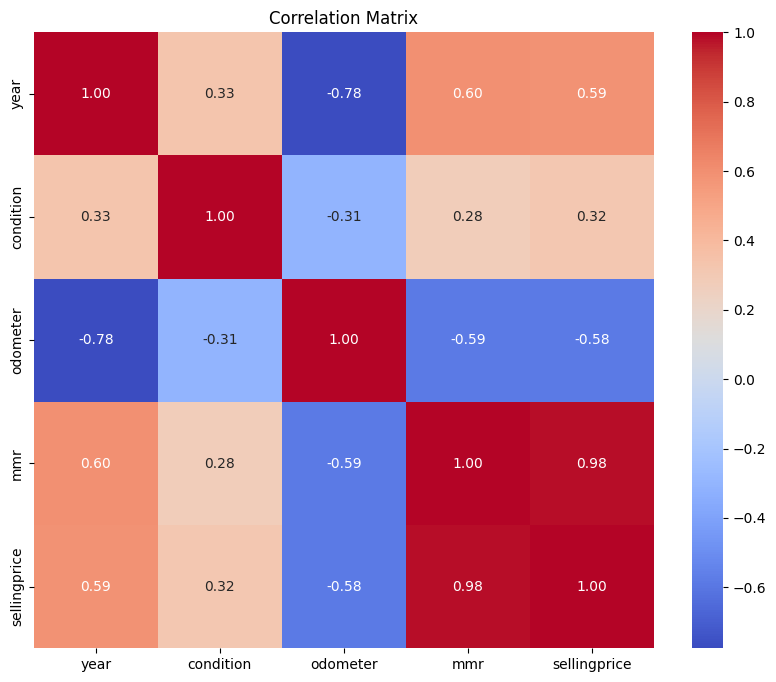

In [47]:
corr_matrix = factors.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

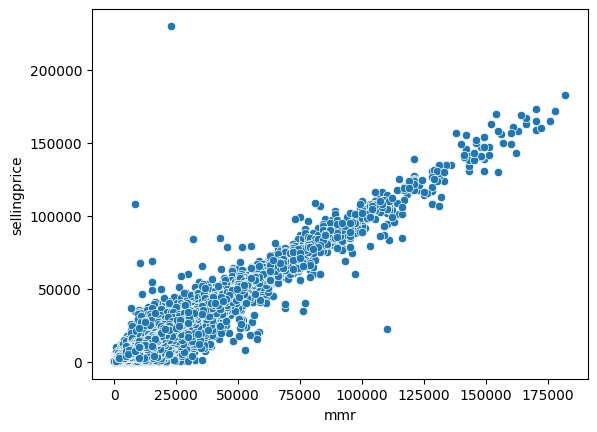

In [48]:
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.show()

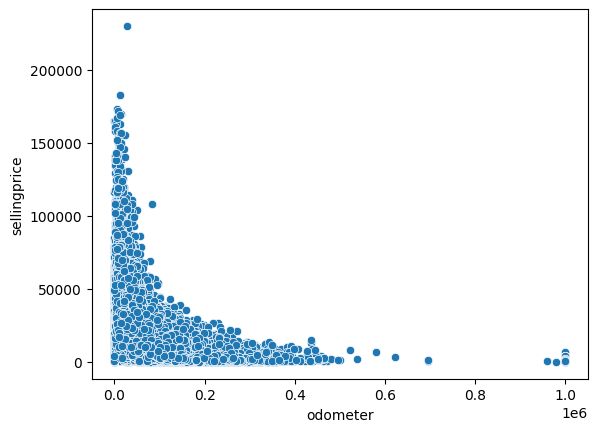

In [49]:
sns.scatterplot(x='odometer', y='sellingprice', data=df)
plt.show()

- Here scatterplots explain some relationship between sellingprice and mmr and odometer.As you can see,the less number on the odometer is the higher is price,as well Manheim Market Report gives accurate estimation of real price of a car

# Saving the cleaned df to Excel and analyzing in Tableau
- Link to viz in Tableau - https://public.tableau.com/app/profile/vladislav.zabrovsky/viz/CarMarketAnalysis_17112246750800/Dashboard2

In [50]:
df.to_excel('cleaned_car_data.xlsx', sheet_name='data', index=False)